In [50]:
# Python 
# Statistics 
# Data processing 
# Multiple linear regression 

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [52]:
# Step 1 - read the data 
bikes = pd.read_csv('hour.csv')

In [53]:
# Step 2 - prelim analysis and feature selection 
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index','date','casual','registered'], axis=1)

In [54]:
# Basic checks of missing values 
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

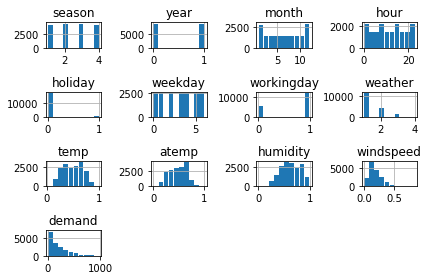

In [55]:
# visualise the data using pandas histogram
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()

In [56]:
# important point - Predicted variable demand is not normally distributed

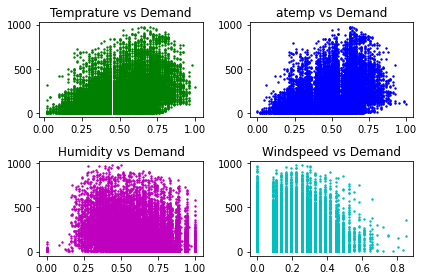

In [57]:
# Data visulisation of continous variables
# Visulise the continous feature vs demand 

plt.subplot(2,2,1)
plt.title("Temprature vs Demand")
plt.scatter(bikes_prep['temp'],bikes_prep['demand'], s=2, c='g')

plt.subplot(2,2,2)
plt.title("atemp vs Demand")
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title("Humidity vs Demand")
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title("Windspeed vs Demand")
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'], s=2, c='c')

plt.tight_layout()

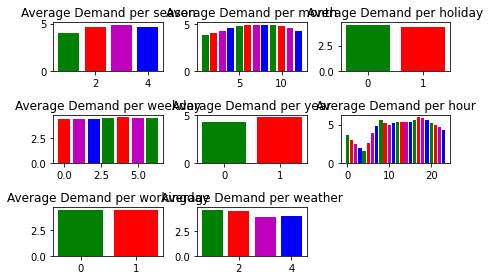

In [73]:
# Data visulisation of categorical variables
# Plot the categorical features vs demand
# Create a 3 * 3 subplot 
from turtle import color

plt.subplot(3,3,1)
plt.title('Average Demand per season')

# Create unique seasons values 
cat_list = bikes_prep['season'].unique()

# create average demand per season using groupby
cat_average = bikes_prep.groupby('season').mean()['demand']
colours = ['g','r','m','b']
plt.bar(cat_list, cat_average, color=colours)

plt.subplot(3,3,2)
plt.title('Average Demand per month')
cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colours)

plt.subplot(3,3,3)
plt.title('Average Demand per holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colours)

plt.subplot(3,3,4)
plt.title('Average Demand per weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colours)

plt.subplot(3,3,5)
plt.title('Average Demand per year')
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colours)

plt.subplot(3,3,6)
plt.title('Average Demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colours)

plt.subplot(3,3,7)
plt.title('Average Demand per workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colours)

plt.subplot(3,3,8)
plt.title('Average Demand per weather')
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colours)

plt.tight_layout()

In [59]:
# Featured to be dropped 
# weekday
# year 
# working day
# atemp
# wind speed

In [60]:
#  Check for the outliers
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [61]:
bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [62]:
# Step 4: _ check multiple linear regression assumptions
# linearity using correlation coefficient matrix using corr
from statistics import correlation

correlation = bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()

In [63]:
# bikes_prep = bikes_prep.drop(['weekday'], axis=1)
bikes_prep.describe()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474795, 0.47049642, 0.49622893, 0.49404147, 0.46796018,
        0.47732133, 0.5267586 , 0.59145856, 0.65201694, 0.7151968 ,
        0.8059117 , 0.9253113 , 1.        , 0.9253113 , 0.8059117 ,
        0.7151968 , 0.65201694, 0.59145856, 0.5267586 , 0.47732133,
        0.46796018, 0.49404147, 0.49622893, 0.47049642, 0.45474795],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1e5e6077220>)

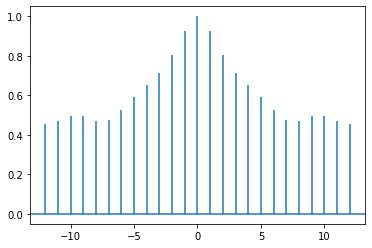

In [64]:
# check the autocorrelation in demand using acorr
df1 = pd.to_numeric(bikes_prep['demand'], downcast='float')

plt.acorr(df1, maxlags=12)

<AxesSubplot:>

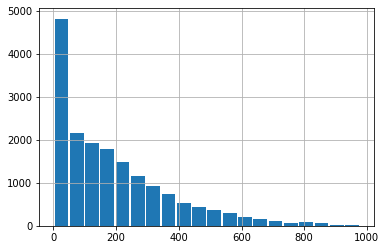

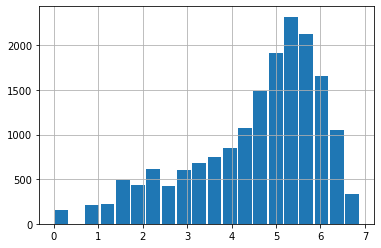

In [65]:
# Step 6 - Create / modify new features 
# Log nomalise the feature demand 

df1 = bikes_prep['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)

In [66]:
bikes_prep['demand'] = np.log(bikes_prep['demand'])

In [67]:
# Autocorrelation in the demand column 
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep,t_1,t_2,t_3], axis=1)

bikes_prep_lag = bikes_prep_lag.dropna()

In [68]:
#  step 7 - creation of dummy variable and drop first to avoid dummy variables trap using get_dummies

# dummy_df = pd.get_dummies(bikes_prep_lag,drop_first=True)

bikes_prep_lag.dtypes

bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag,drop_first=True)


In [69]:
# Step 8 - create train and test split 

# split the x and y dataset and test split 

from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

# Demand is time depandent or time series 
y = bikes_prep_lag[['demand']]
x = bikes_prep_lag.drop(['demand'], axis=1)

# create the size of 70% of the data
tr_size = 0.7*len(x)
tr_size = int(tr_size)

x_train = x.values[0:tr_size]
x_test = x.values[tr_size : len(x)]

y_train = y.values[0:tr_size]
y_test = y.values[tr_size : len(x)]


In [70]:
# Step -9 Fit and score the model 

# Linear regression 
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(x_train,y_train)

r2_train = std_reg.score(x_train,y_train)
r2_test = std_reg.score(x_test,y_test)

# Create y predictions 
y_predict = std_reg.predict(x_test)
print(y_predict)

[[3.23319622]
 [2.87481435]
 [3.24802953]
 ...
 [4.5129891 ]
 [4.42666714]
 [3.87424884]]


In [71]:
# calculation of rmse error
from sklearn .metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test,y_predict))
print(rmse)

0.3593312608133167


In [72]:
# Final step - calculation of RMSLE and comparasion of result 
y_test_e = []
y_predict_e = []

for i in range(0,len(y_test)):
    y_test_e.append(math.exp(y_test[i]))
    y_predict_e.append(math.exp(y_predict[i]))

# do the sum of the logs and squares
log_sq_sum = 0.0

for i in range(0,len(y_test_e)):
    log_a = math.log(y_test_e[i]+1)
    log_p = math.log(y_predict_e[i]+1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(y_test))

print(rmsle)


0.33545056235748216
